# Pyber's Analysis 
# 1. Urban cities have the highest percentage of total fares, rides, and drivers compared to 2 other cities.
# 2. The highest fares is actually from the rural cities with less number of rides, where the lowest fares is in the urban cities according to the bubble plot.
# 3. The suburban cities is doing not too bad compared to the rural. Hence, the suburban area could potentially be a good area to expand the business. We can add more drivers to operate in these areas.

In [65]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_load = "data/city_data.csv"
ride_data_load = "data/ride_data.csv"



In [66]:
#read city file
City_df = pd.read_csv(city_data_load,encoding="utf-8")
City_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [67]:
#read ride file
Ride_df = pd.read_csv(ride_data_load,encoding="utf8")
Ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [68]:
#Merge both data set
City_Ride_Merge = pd.merge(Ride_df,City_df, on='city',how='outer')
City_Ride_Merge.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


# Bubble Plot of Ride Sharing Data

In [69]:
#Average Fares per City
Groupby_city = City_Ride_Merge.groupby('city')
Groupby_city
Avg_fare = Groupby_city.mean()['fare']
Avg_fare
Total_ride = Groupby_city['ride_id'].count()
Total_ride
Total_drivers = Groupby_city['driver_count'].count()
Total_drivers

city_type = City_df.set_index('city')['type']
city_type

City_info_df = pd.DataFrame({"Total number of rides":Total_ride,
                            "Total number of drivers": Total_drivers,
                            "Average Fare":Avg_fare,
                            "Type of City":city_type})
City_info_df

City_data = City_info_df.sort_values('Total number of drivers', ascending = False)
# create seperate dfs for each city
Urban = City_info_df.loc[City_info_df["Type of City"]=="Urban"]
Suburban = City_info_df.loc[City_info_df["Type of City"]=="Suburban"]
Rural = City_info_df.loc[City_info_df["Type of City"]=="Rural"]



In [80]:
City_data.head()

,Total number of rides,Total number of drivers,Average Fare,Type of City
West Angela,39,39,25.990000,Urban
South Karenland,38,38,26.535526,Urban
North Jason,35,35,22.743714,Urban
Liumouth,33,33,26.150000,Urban
Port Frank,33,33,27.201515,Urban


In [71]:
city_type.value_counts()

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [72]:
#Obtain x and y of coordinates for each of the three city types
#Color Scheme


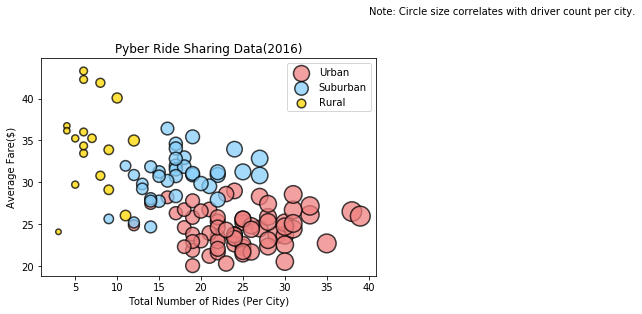

In [73]:
#Urban's ScatterPlot
Urban_plot = plt.scatter(Urban["Total number of rides"],Urban["Average Fare"],s =Urban["Total number of drivers"]*10,facecolors="lightcoral",
         edgecolor='black',label='Urban',alpha=.75,linewidth = 1.5)
Suburban_plot= plt.scatter(Suburban["Total number of rides"],Suburban["Average Fare"],s =Suburban["Total number of drivers"]*10,facecolors='lightskyblue',
           edgecolor ='black',label='Suburban',alpha=.75,linewidth = 1.5)
Rural_plot = plt.scatter(Rural["Total number of rides"],Rural["Average Fare"],s =Rural["Total number of drivers"]*10,facecolors='gold',
           edgecolor ='black',label='Rural',alpha=.75,linewidth = 1.5)
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(handles=[Urban_plot,Suburban_plot,Rural_plot], loc="best")
plt.text(40, 50,"Note: Circle size correlates with driver count per city.")
plt.show()

# Total Fare by City Type

In [74]:
Total_fare = City_Ride_Merge.groupby(by='type')['fare'].sum()
Total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

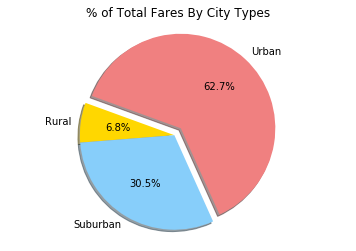

In [75]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(Total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Fares By City Types.png")
plt.show()



# TOTAL RIDES BY CITY TYPE

In [76]:
Total_rides = City_Ride_Merge.groupby(by='type')['ride_id'].count()
Total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

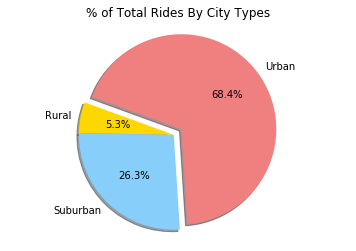

In [77]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Types")
plt.pie(Total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Rides By City Types.png")
plt.show()


# Total Drivers by City Type

In [78]:
Total_Drivers = City_Ride_Merge.groupby(by='type')['driver_count'].sum()
Total_Drivers

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

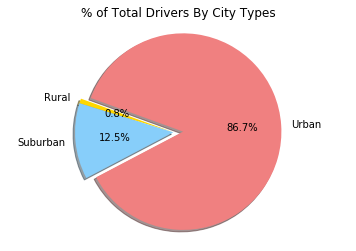

In [79]:
labels = ['Rural', 'Suburban', 'Urban']
colors = ["gold","lightskyblue","lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Drivers By City Types")
plt.pie(Total_Drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)
plt.axis("equal")
plt.savefig("% of Total Drivers By City Types.png")
plt.show()